In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [4]:
#Import data
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
#Convert categorical variables into one-hot encoding
dataset = pd.get_dummies(dataset, columns = ['sex', 'smoker', 'region'], drop_first=True)
dataset.tail()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1333,50,31.0,3,10600.55,1,0,1,0,0
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,1
1337,61,29.1,0,29141.36,0,1,1,0,0


In [6]:
#Split dataset into train and test data
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [7]:
#Get stats to use when standardizing data
train_stats = train_dataset.describe()
train_stats.pop('expenses')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
age,1070.0,39.036449,14.142122,18.0,26.0,39.0,51.0,64.0
bmi,1070.0,30.737290,6.065193,16.0,26.3,30.5,34.8,53.1
children,1070.0,1.093458,1.211364,0.0,0.0,1.0,2.0,5.0
sex_male,1070.0,0.498131,0.500230,0.0,0.0,0.0,1.0,1.0
smoker_yes,1070.0,0.199065,0.399484,0.0,0.0,0.0,0.0,1.0
region_northwest,1070.0,0.235514,0.424518,0.0,0.0,0.0,0.0,1.0
region_southeast,1070.0,0.281308,0.449848,0.0,0.0,0.0,1.0,1.0
region_southwest,1070.0,0.234579,0.423934,0.0,0.0,0.0,0.0,1.0


In [8]:
#Remove expenses column to label datasets
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [9]:
#Standardize data
def standardize(x):
    return (x - train_stats['mean']) / train_stats['std']

train_dataset = standardize(train_dataset)
test_dataset = standardize(test_dataset)

In [10]:
#Build model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam()

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])

In [11]:
#Train model
EPOCHS = 1000
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_dataset, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:301890432.0000,  mae:12712.6611,  mse:301890432.0000,  val_loss:363295680.0000,  val_mae:14427.5967,  val_mse:363295680.0000,  
....................................................................................................
Epoch: 100, loss:30757044.0000,  mae:3684.5957,  mse:30757044.0000,  val_loss:36490532.0000,  val_mae:4109.4878,  val_mse:36490532.0000,  
....................................................................................................
Epoch: 200, loss:28403394.0000,  mae:3465.7156,  mse:28403394.0000,  val_loss:33691800.0000,  val_mae:3873.6106,  val_mse:33691800.0000,  
....................................................................................................
Epoch: 300, loss:25161940.0000,  mae:3133.5300,  mse:25161940.0000,  val_loss:29851322.0000,  val_mae:3465.3716,  val_mse:29851322.0000,  
....................................................................................................
Epoch: 400, loss:21842912.0000,  ma

Text(0, 0.5, 'Mean Abs Error (expenses)')

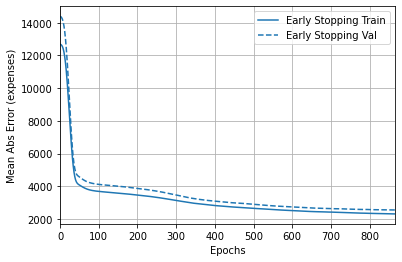

In [12]:
#Plot data
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Early Stopping': history}, metric = "mae")
plt.ylabel('Mean Abs Error (expenses)')

9/9 - 0s - loss: 31557674.0000 - mae: 3042.2905 - mse: 31557674.0000
Testing set Mean Abs Error: 3042.29 expenses
You passed the challenge. Great job!


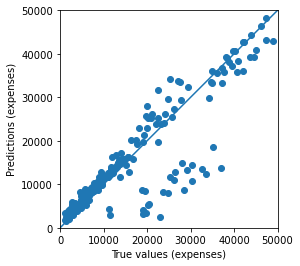

In [13]:
#Test model by checking how well model generalizes using test set
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)